# Explanation of Modulation Instability

The Nonlinear Schrodinger Equation is given by:

$\frac{\partial A}{\partial z}=-i \frac{\beta_2}{2} \frac{\partial^2 A}{\partial T^2}+i\gamma|A|^2A$.

If $\beta_2<0$, meaning that we have anormalous dispersion where blue light propagates faster than red light, and $\gamma>0$, we can achieve "solitons"; optical pulses, which retain their shape as they propagate. 

But what happens if we add a tiny bit of noise? Will we still get nice, clean solitons? By adding noise, we essentially introduce additional light with a range of frequencies. These will modulate the refractive index of the glass, which in turn modulates the phase of the pulse sinusoidally, which transfers power away from the carrier frequency and into adjacent ones above and below. This is essentially the same effect as Four-Wave Mixing demonstrated here: 

https://youtu.be/gsa9hrCbnqI 
 
Crucially, the presence of anormalous dispersion means that particular frequency components will gain more power from the carrier than others. We say that they are "phase matched". This causes the output signal to contain spikes with a temporal spacing equal to the reciprocal of this frequency component. 

For an analytical derication, please see this excellent explanation by

Marcus R.A. Newman:
https://prefetch.eu/know/concept/modulational-instability/

# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Import custom functions for running SSFM

In [3]:
from ssfm_functions_for_MI_video import *


## Initialize timebase

In [4]:
N  = 2**14 #Number of points
dt = 0.1e-12 #Time resolution [s] 
carrier_freq_Hz=193.4e12
time_freq=TimeFreq(N,dt,carrier_freq_Hz)

 ### timeFreq Configuration Parameters ###
Number of points		= 16384
Start time, tmin		= -819.200ps
Stop time, tmax		= 819.200ps
Time resolution		= 0.100ps
  
  Center frequency		= 193.400THz
Start frequency		= -5.000THz
Stop frequency 		= 4.999THz
Frequency resolution 		= 610.314MHz
   


## Initialize fiber with anormalous dispersion ($\beta_2<0$)

In [8]:


#Define fiber parameters
Length          = 500      #Fiber length in m
number_of_steps = 2**11
gamma           = 40e-3     #Nonlinearity parameter in 1/W/m 
beta2           = -100e3    #Dispersion in fs^2/m (units typically used when referring to beta2) 
beta2          *= (1e-30)  #Convert fs^2 to s^2 so everything is in SI units
beta_list = [beta2]
alpha_dB_per_m  = 0.0e-3   #Power attenuation coeff in decibel per m. Usual value at 1550nm is 0.2 dB/km

#Note:  beta2>0 is normal dispersion with red light pulling ahead, 
#       causing a negative leading chirp
#       
#       beta2<0 is anormalous dispersion with blue light pulling ahead, 
#       causing a positive leading chirp.


#  Initialize class
fiber_span=FiberSpan(Length,number_of_steps, gamma, beta_list, alpha_dB_per_m)
fiber_link = FiberLink([fiber_span])

 ### Characteristic parameters of fiber: ###
Fiber Length [km] 	= 0.5 
Number of Steps 	= 2048 
dz [m] 	= 0.244140625 
Fiber gamma [1/W/m] 	= 0.04 
Fiber beta2 [s^2/m] 	= -1e-25 
Fiber beta3 [s^3/m] 	= 0.0 
Fiber beta4 [s^4/m] 	= 0.0 
Fiber beta5 [s^5/m] 	= 0.0 
Fiber beta6 [s^6/m] 	= 0.0 
Fiber beta7 [s^7/m] 	= 0.0 
Fiber beta8 [s^8/m] 	= 0.0 
Fiber alpha_dB_per_m 	= 0.0 
Fiber alpha_Np_per_m 	= 0.0 
Fiber total loss [dB] 	= 0.0 
Raman Model 	= None. (fR,tau1,tau2)=(0.0,0.0,0.0) 
Input Loss [dB] = 0.0 
Output Amplification [dB] = 0.0 
Noise Factor [dB] = -1000.0 
Output Attenuation [dB] = 0.0 
 


## Initialize "clean" Gaussian pulse and noisy Gaussian pulse

 ### Input Signal Parameters ###
  Pmax 				= 1.000 W
  Duration 			= 100.000 ps
  Time offset 			= 0.000 ps
  Freq offset 			= 0.000 GHz
  Chirp 			= 0.000
  pulseType 			= gaussian
  order 			= 1
  noiseAmplitude 		= 0.000 sqrt(W)
   


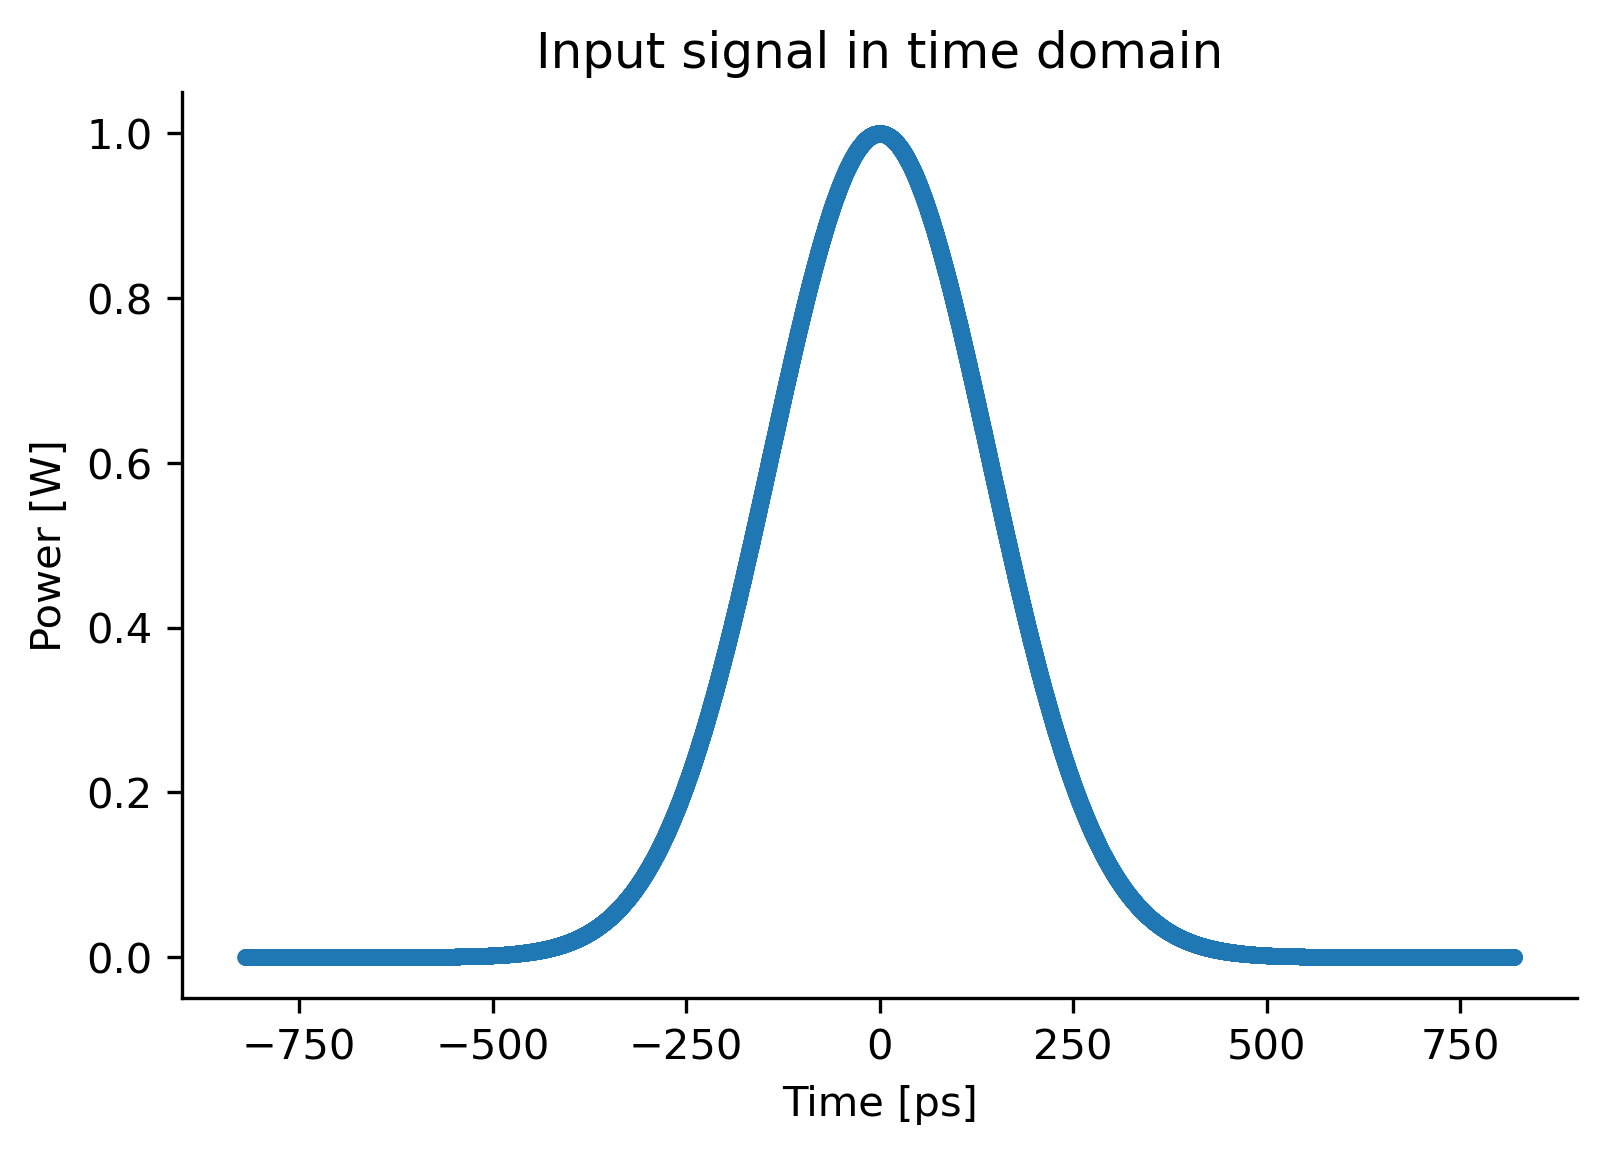

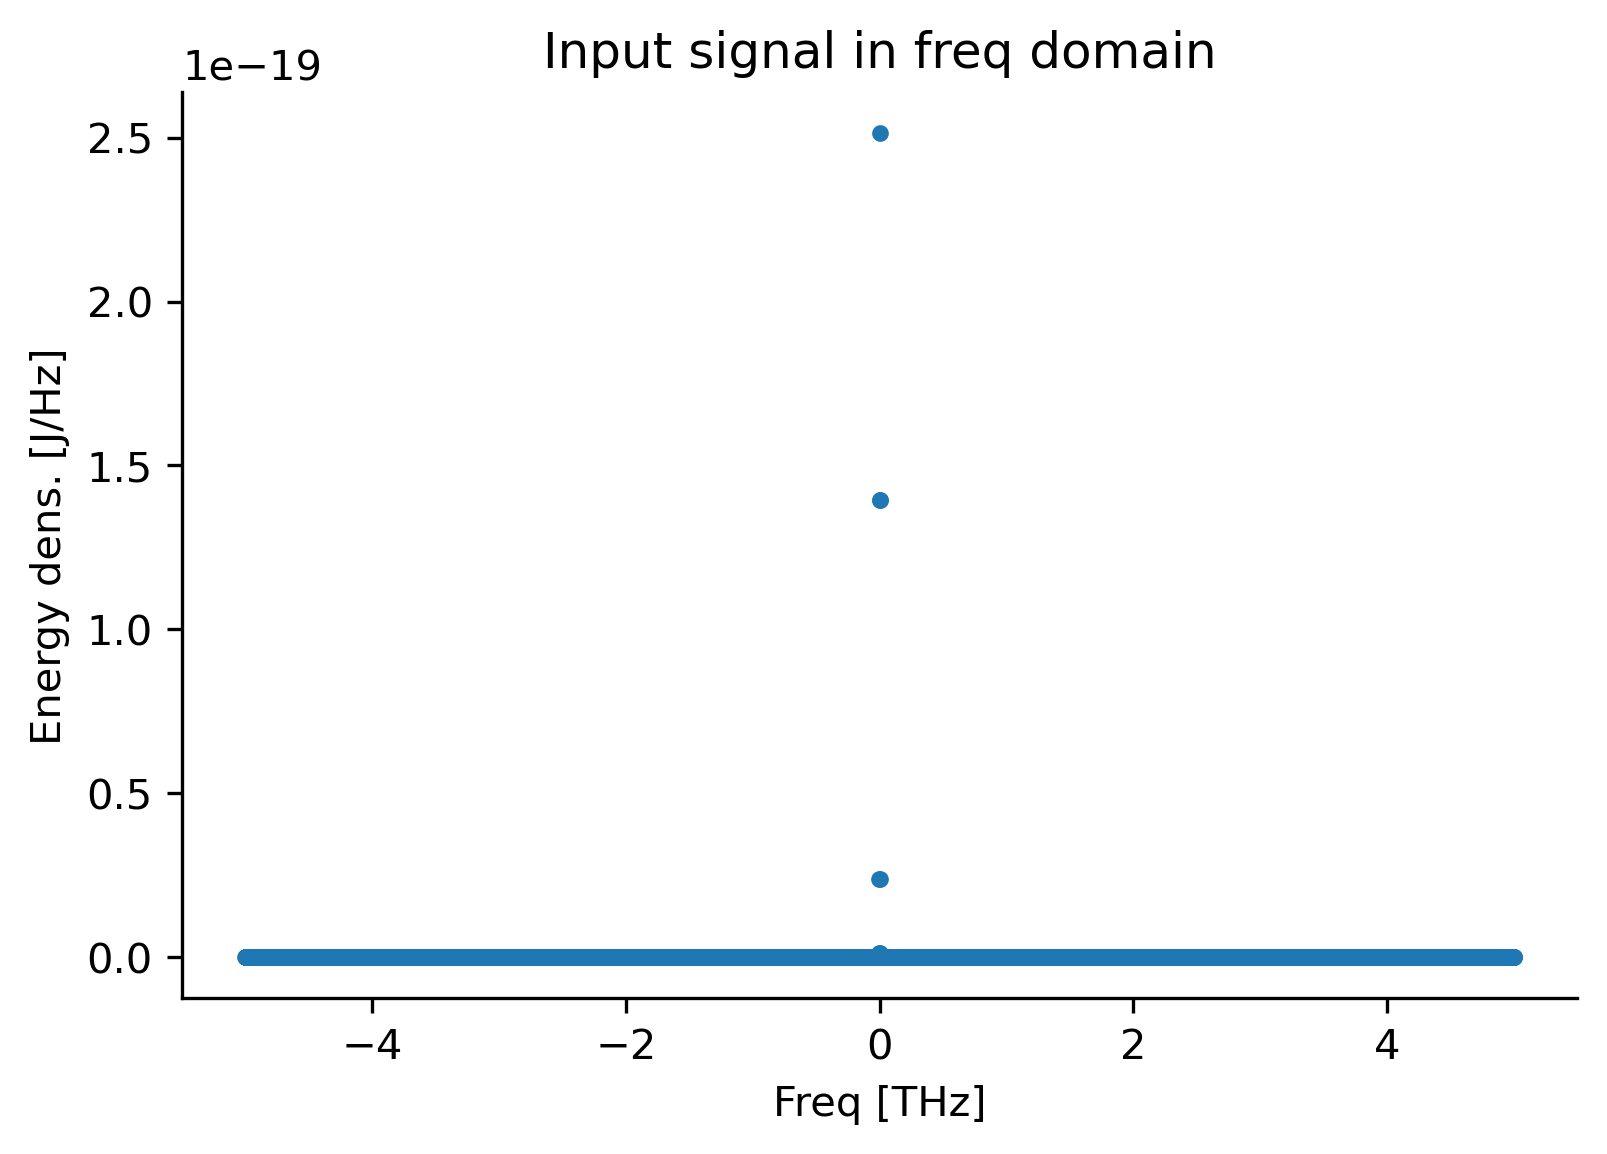

 ### Input Signal Parameters ###
  Pmax 				= 1.000 W
  Duration 			= 100.000 ps
  Time offset 			= 0.000 ps
  Freq offset 			= 0.000 GHz
  Chirp 			= 0.000
  pulseType 			= gaussian
  order 			= 1
  noiseAmplitude 		= 0.000 sqrt(W)
   


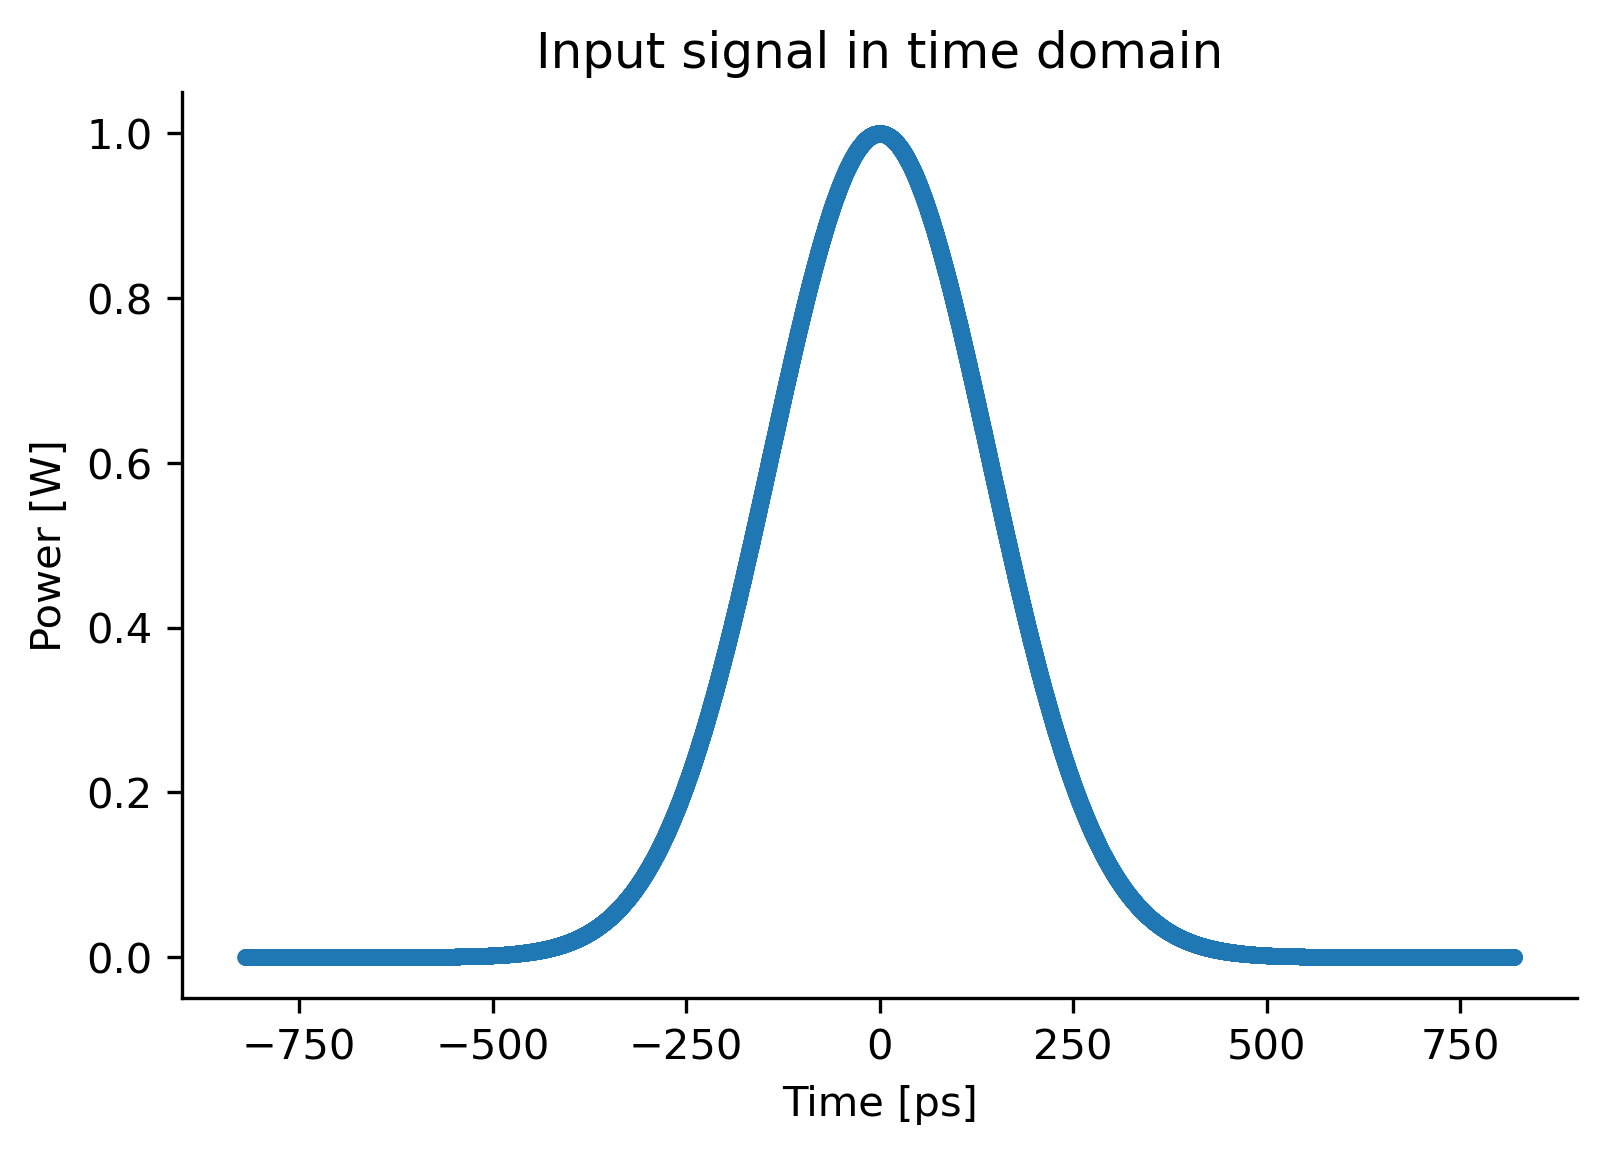

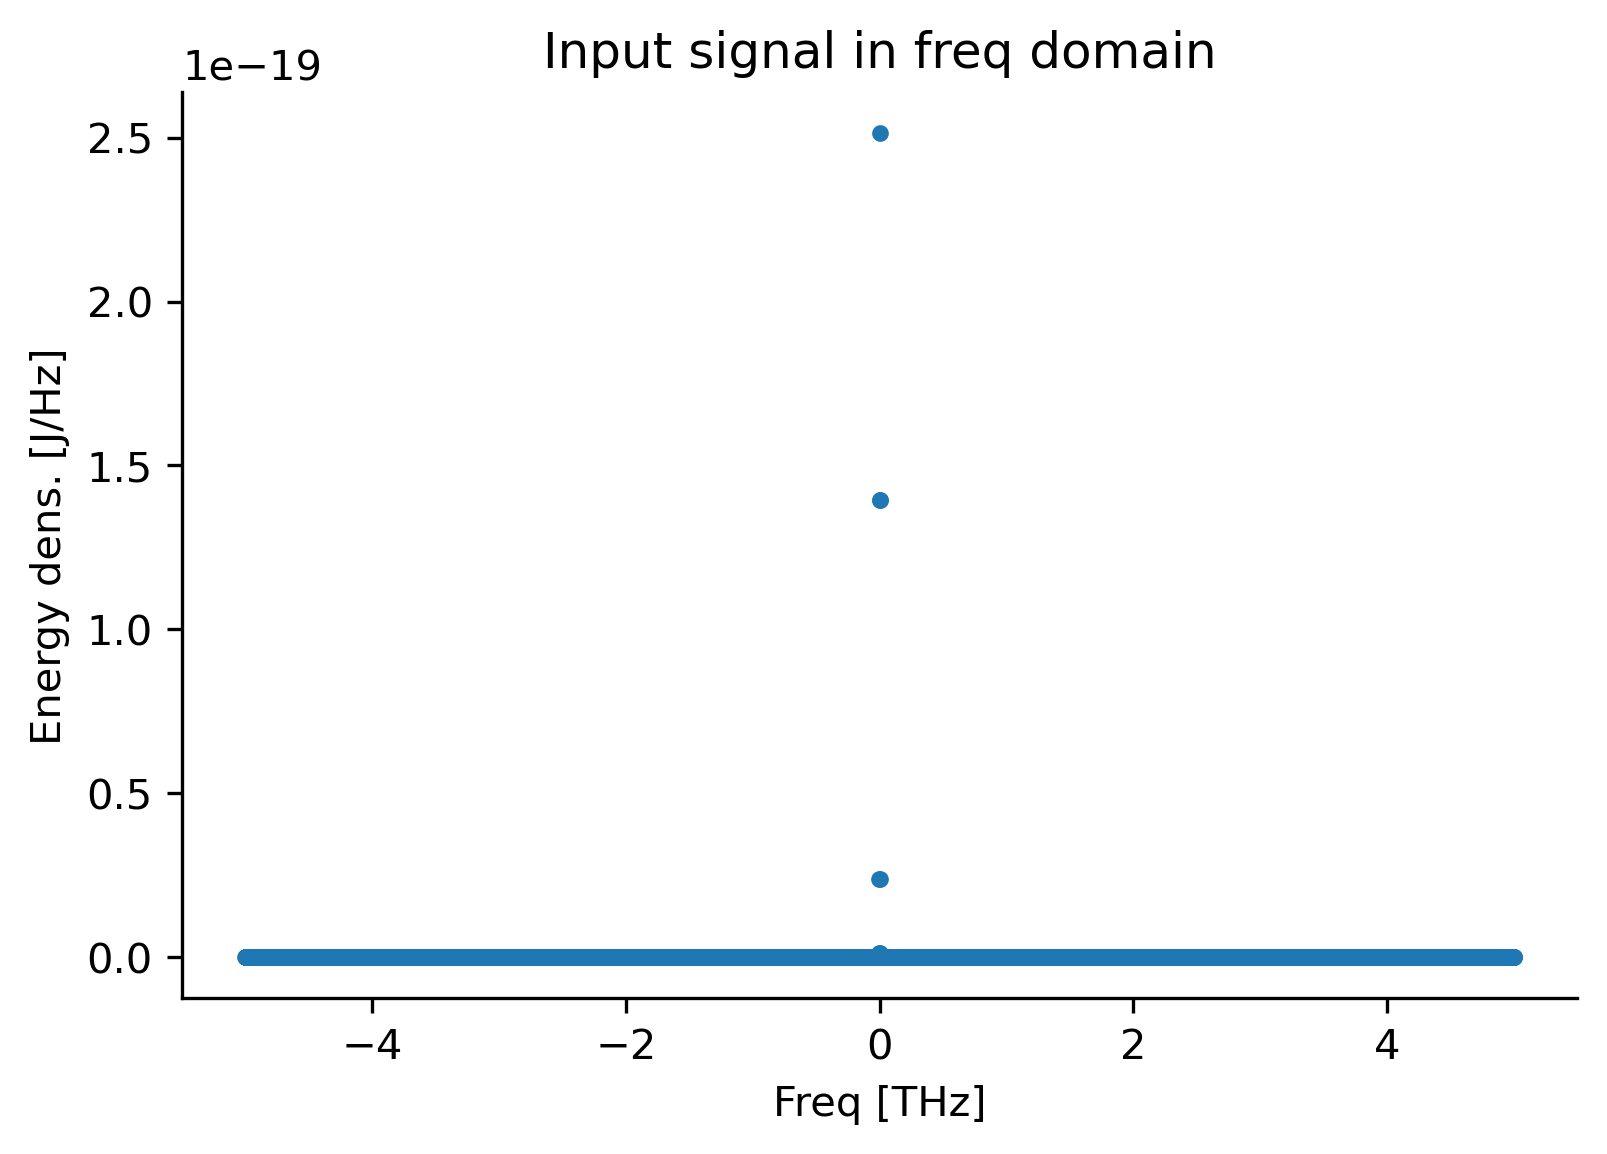

 ### Input Signal Parameters ###
  Pmax 				= 1.010 W
  Duration 			= 100.000 ps
  Time offset 			= 0.000 ps
  Freq offset 			= 0.000 GHz
  Chirp 			= 0.000
  pulseType 			= gaussian
  order 			= 1
  noiseAmplitude 		= 0.001 sqrt(W)
   


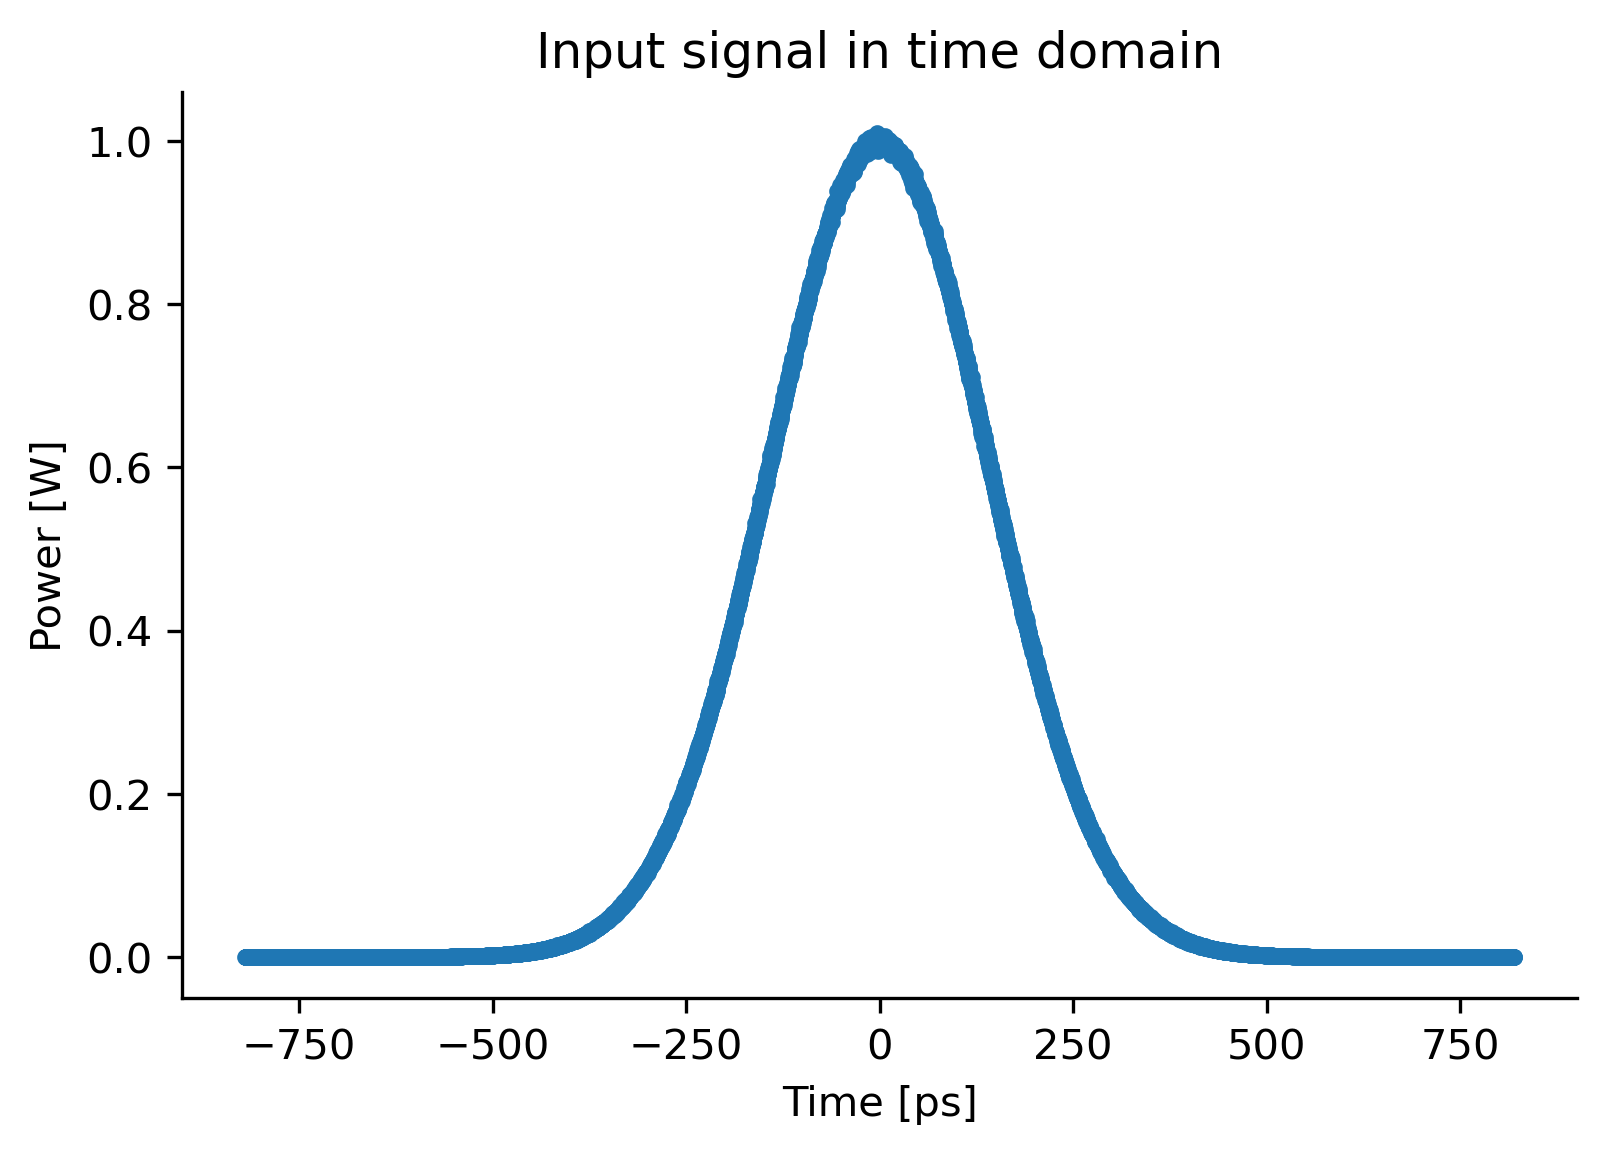

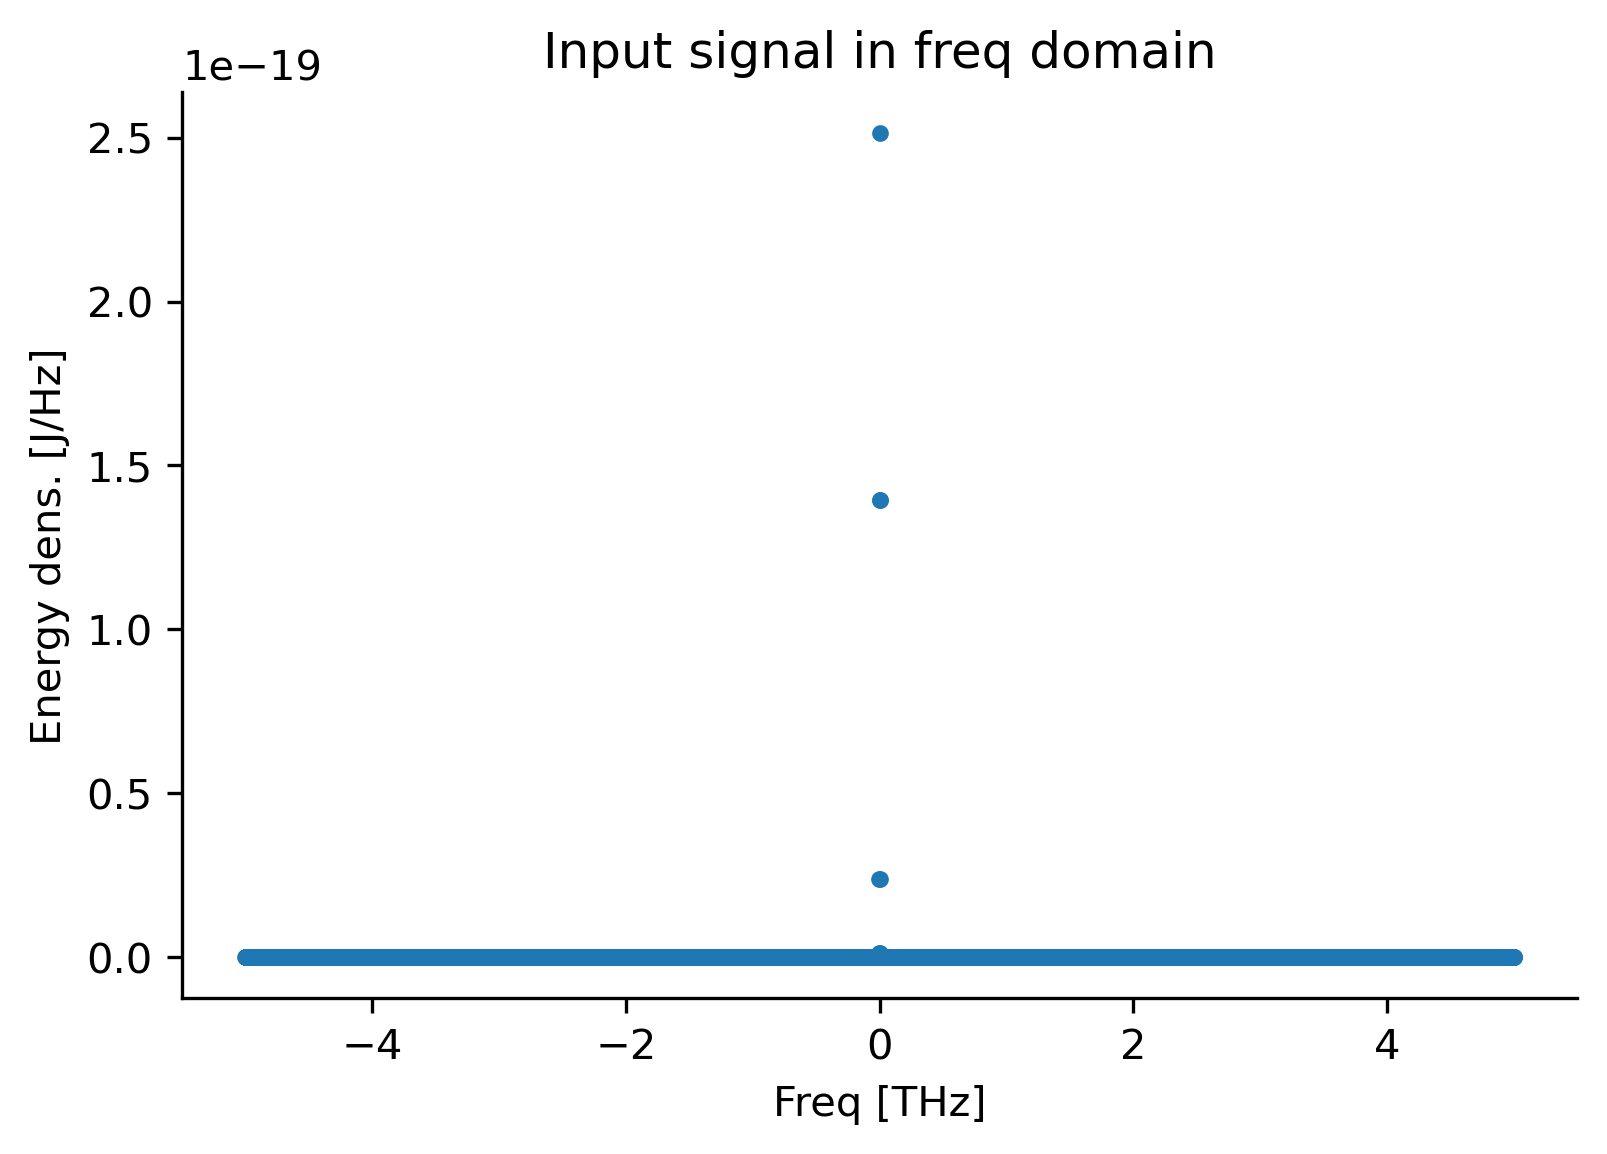

 ### Input Signal Parameters ###
  Pmax 				= 1.010 W
  Duration 			= 100.000 ps
  Time offset 			= 0.000 ps
  Freq offset 			= 0.000 GHz
  Chirp 			= 0.000
  pulseType 			= gaussian
  order 			= 1
  noiseAmplitude 		= 0.001 sqrt(W)
   


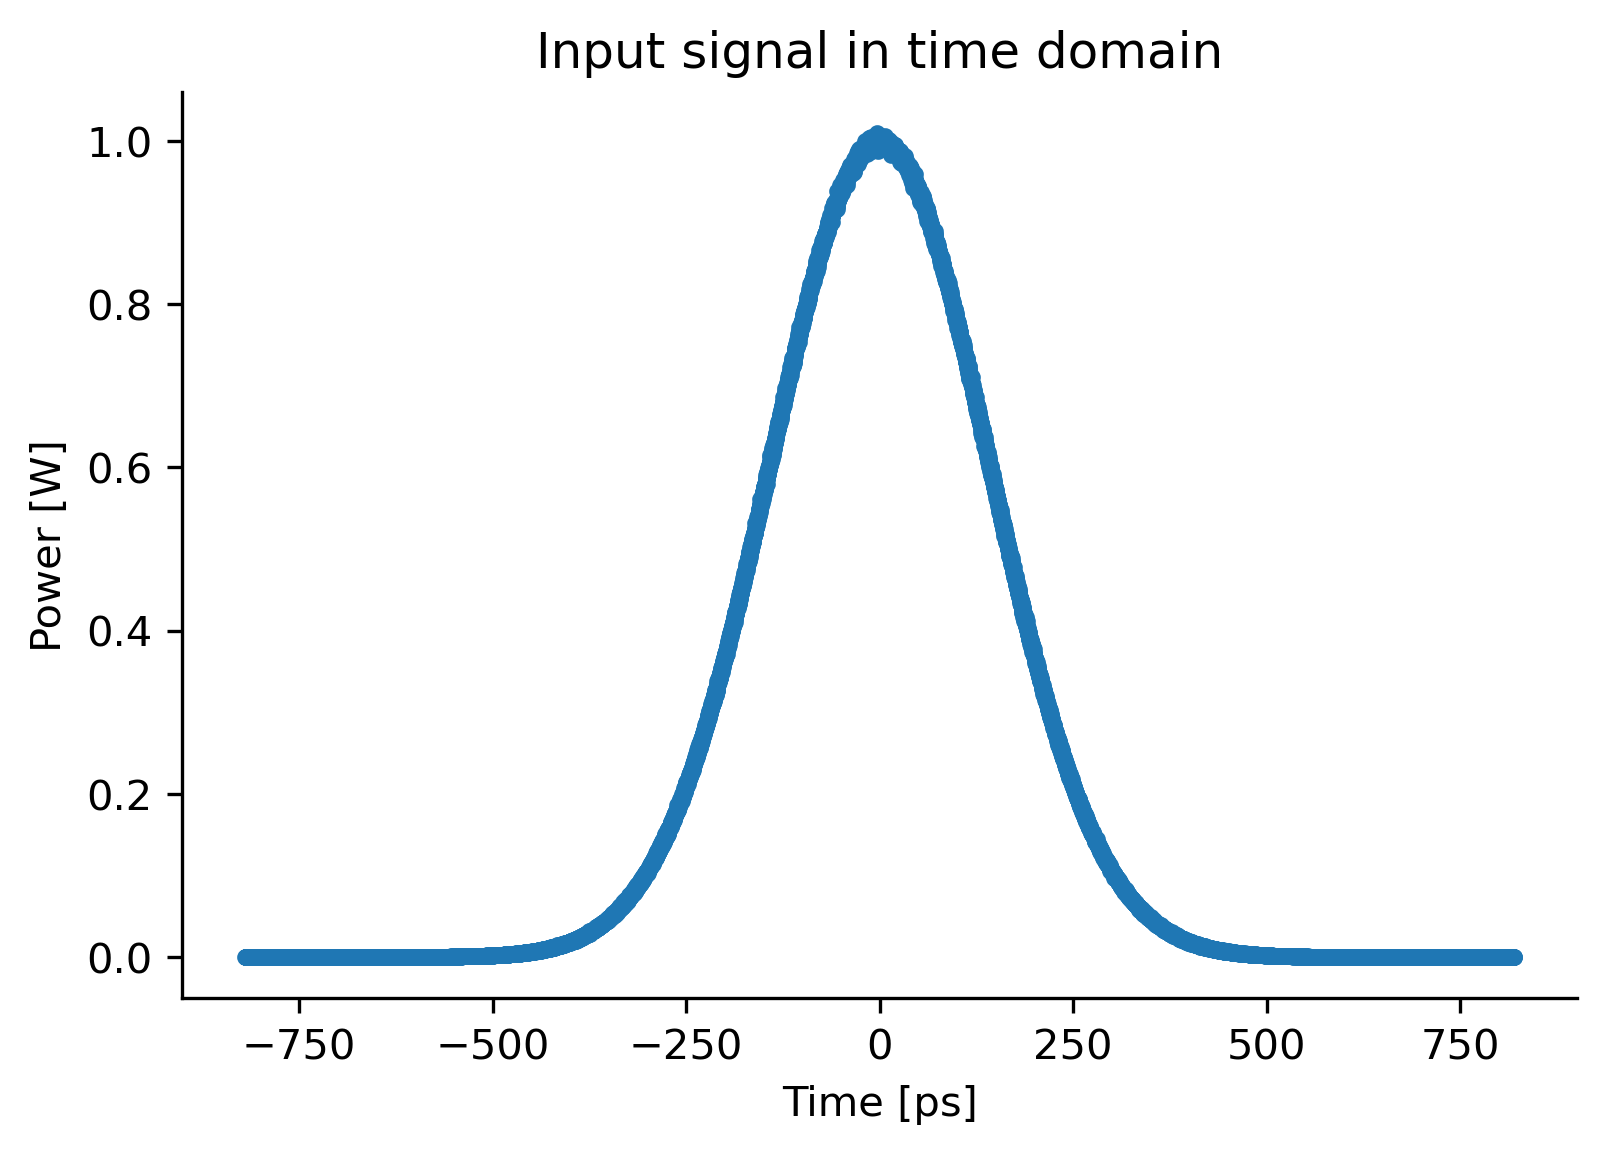

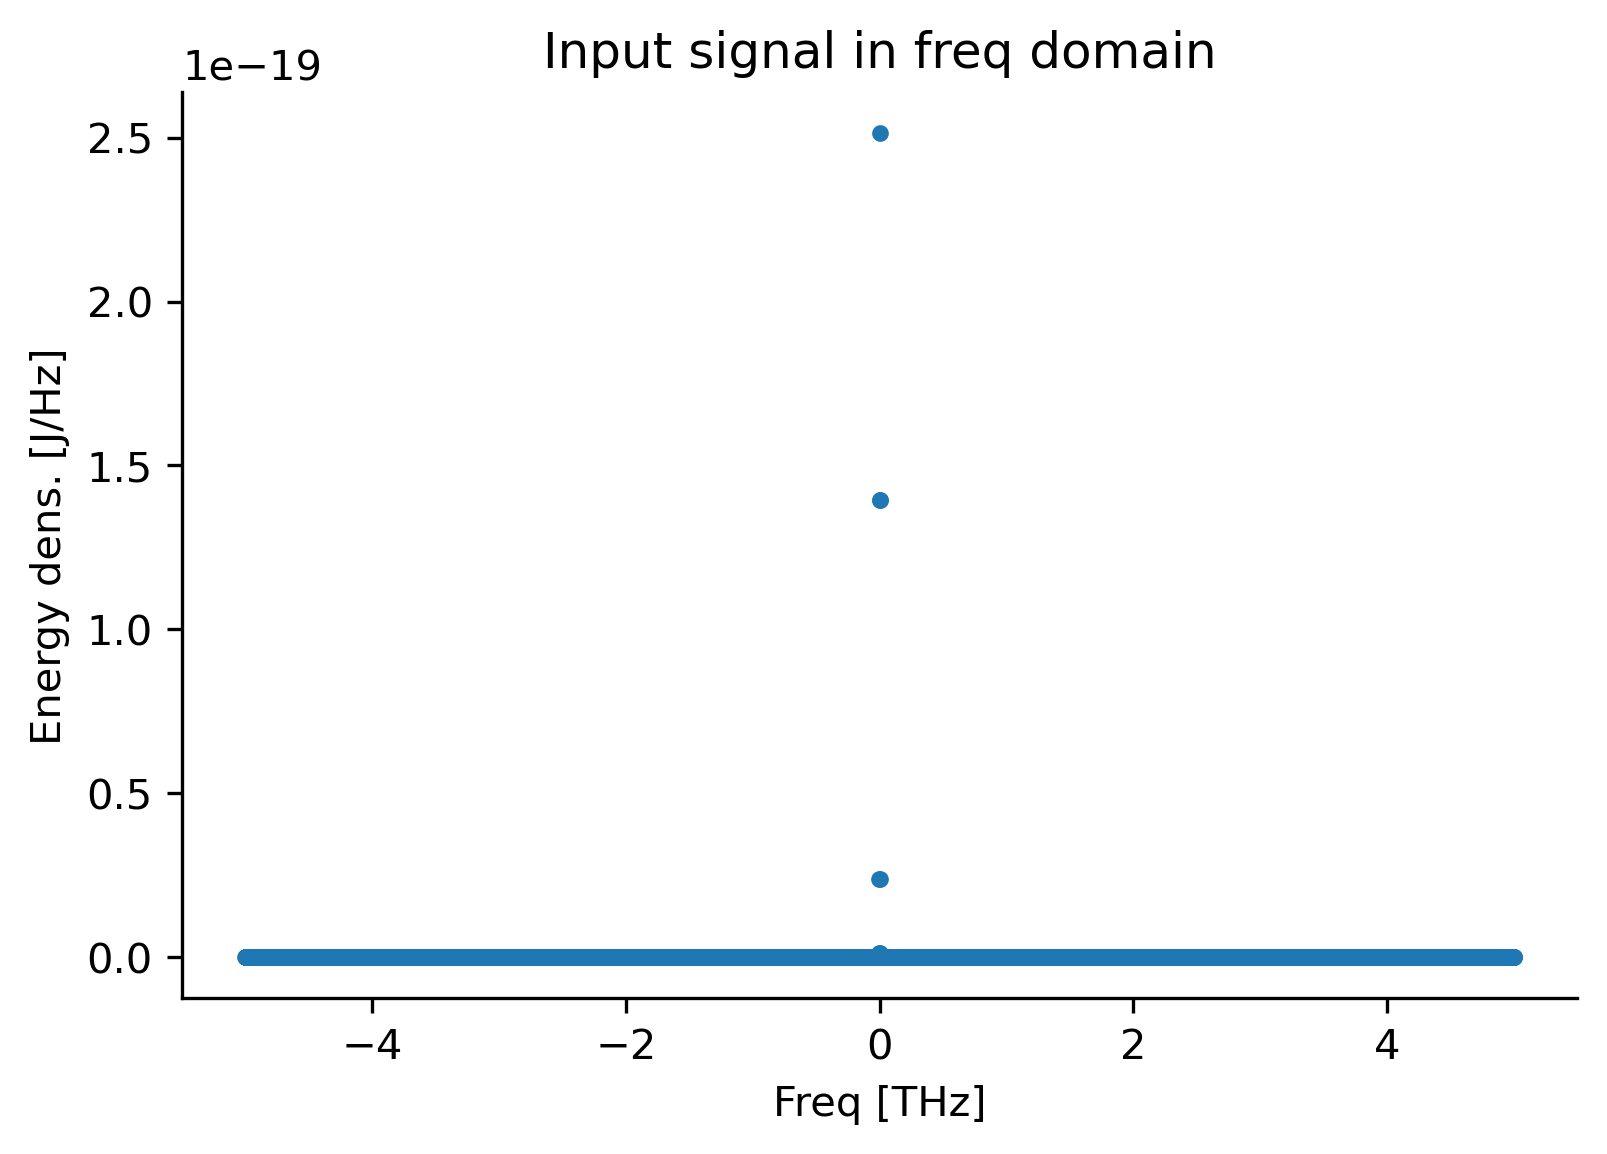

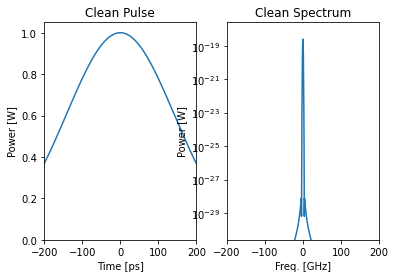

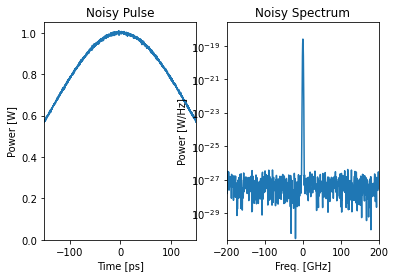

MI frequency = 142.35250868343542 GHz 


In [14]:
#Initialize Gaussian pulse with no noise


cleanAmplitude = 1                    #Amplitude in units of sqrt(W)
cleanDuration  =1000*time_freq.time_step    #Pulse 1/e^2 duration [s]
cleanOffset    = 0                             #Time offset
cleanChirp = 0                                 #Chirp factor
cleanCarrierFreq=0                             #Freq. offset
cleanPulseType='gaussian'                      #'Gaussian', 'square', 'sech'
cleanOrder = 1                                 #Order of Gaussian pulse
cleanNoiseAmplitude = 0.0                      #Added ASE noise amplitude


cleanInputSignal = InputSignal(time_freq, 
                                     cleanAmplitude ,
                                     cleanDuration,
                                     cleanOffset,
                                     cleanChirp,
                                     cleanCarrierFreq,
                                     cleanPulseType,
                                     cleanOrder,
                                     cleanNoiseAmplitude)



#Initialize Gaussian pulse with ASE noise


testAmplitude = cleanAmplitude                   #Amplitude in units of sqrt(W)
testDuration  =cleanDuration    #Pulse 1/e^2 duration [s]
testOffset    = cleanOffset                             #Time offset
testChirp = cleanChirp                                 #Chirp factor
testCarrierFreq=cleanCarrierFreq                             #Freq. offset
testPulseType=cleanPulseType                     #'Gaussian', 'square', 'sech'
testOrder = cleanOrder                                 #Order of Gaussian pulse
testNoiseAmplitude = cleanAmplitude* 1e-3                     #Added ASE noise amplitude


testInputSignal = InputSignal(time_freq, 
                                     testAmplitude ,
                                     testDuration,
                                     testOffset,
                                     testChirp,
                                     testCarrierFreq,
                                     testPulseType,
                                     testOrder,
                                     testNoiseAmplitude)


fig,ax=plt.subplots(1,2)
ax[0].set_title("Clean Pulse")
ax[0].plot(cleanInputSignal.timeFreq.t*1e12,get_power(cleanInputSignal.amplitude),'C0')
ax[0].set_xlim(-2*testInputSignal.duration*1e12,2*testInputSignal.duration*1e12)
ax[0].set_ylim(0,cleanAmplitude**2*1.05)
ax[0].set_xlabel("Time [ps]")
ax[0].set_ylabel("Power [W]")

ax[1].set_title("Clean Spectrum")
ax[1].plot(cleanInputSignal.timeFreq.f/1e9,get_power(cleanInputSignal.spectrum),'C0')
ax[1].set_xlim(-20*1/testInputSignal.duration/1e9,20*1/testInputSignal.duration/1e9)
ax[1].set_ylim(np.max(get_power(testInputSignal.spectrum))*1e-12,np.max(get_power(testInputSignal.spectrum))*10)
ax[1].set_yscale('log')
ax[1].set_xlabel("Freq. [GHz]")
ax[1].set_ylabel("Power [W]")
plt.show()

fig,ax=plt.subplots(1,2)
ax[0].set_title("Noisy Pulse")
ax[0].plot(cleanInputSignal.timeFreq.t*1e12,get_power(testInputSignal.amplitude),'C0')
ax[0].set_xlim(-1.5*testInputSignal.duration*1e12,1.5*testInputSignal.duration*1e12)
ax[0].set_ylim(0,cleanAmplitude**2*1.05)
ax[0].set_xlabel("Time [ps]")
ax[0].set_ylabel("Power [W]")

ax[1].set_title("Noisy Spectrum")
ax[1].plot(cleanInputSignal.timeFreq.f/1e9,get_power(testInputSignal.spectrum),'C0')
ax[1].set_xlim(-20*1/testInputSignal.duration/1e9,20*1/testInputSignal.duration/1e9)
ax[1].set_ylim(np.max(get_power(testInputSignal.spectrum))*1e-12,np.max(get_power(testInputSignal.spectrum))*10)
ax[1].set_yscale('log')
ax[1].set_xlabel("Freq. [GHz]")
ax[1].set_ylabel("Power [W/Hz]")
plt.show()


print(f"MI frequency = {np.sqrt(2*testAmplitude**2*gamma/np.abs(beta2))/2/np.pi/1e9} GHz "   )



## Run SSFM to simulate MI

In [16]:
#https://prefetch.eu/know/concept/optical-wave-breaking/

#Run SSFM
ssfm_result_clean = SSFM(fiber_link,cleanInputSignal,experiment_name="MI_clean")
ssfm_result_test = SSFM(fiber_link,testInputSignal,experiment_name="MI_test")


########### Initializing SSFM!!! ###########
Current time is 2024-03-04 15:17:31.810510
Current dir is C:\Users\okrarup\OneDrive - Ciena Corporation\Desktop\SSFM folder\NLSE-vector-solver\TutorialVideos\ModulationInstability-Video\Simulation Results\MI_clean\2024_3_4_15_17_31\
Starting SSFM loop over 1 fibers
Propagating through fiber number 1 out of 1
Running SSFM with 2048 steps
Finished running SSFM!!!
########### Initializing SSFM!!! ###########
Current time is 2024-03-04 15:17:39.290701
Current dir is C:\Users\okrarup\OneDrive - Ciena Corporation\Desktop\SSFM folder\NLSE-vector-solver\TutorialVideos\ModulationInstability-Video\Simulation Results\MI_test\2024_3_4_15_17_39\
Starting SSFM loop over 1 fibers
Propagating through fiber number 1 out of 1
Running SSFM with 2048 steps
Finished running SSFM!!!


## Plot results

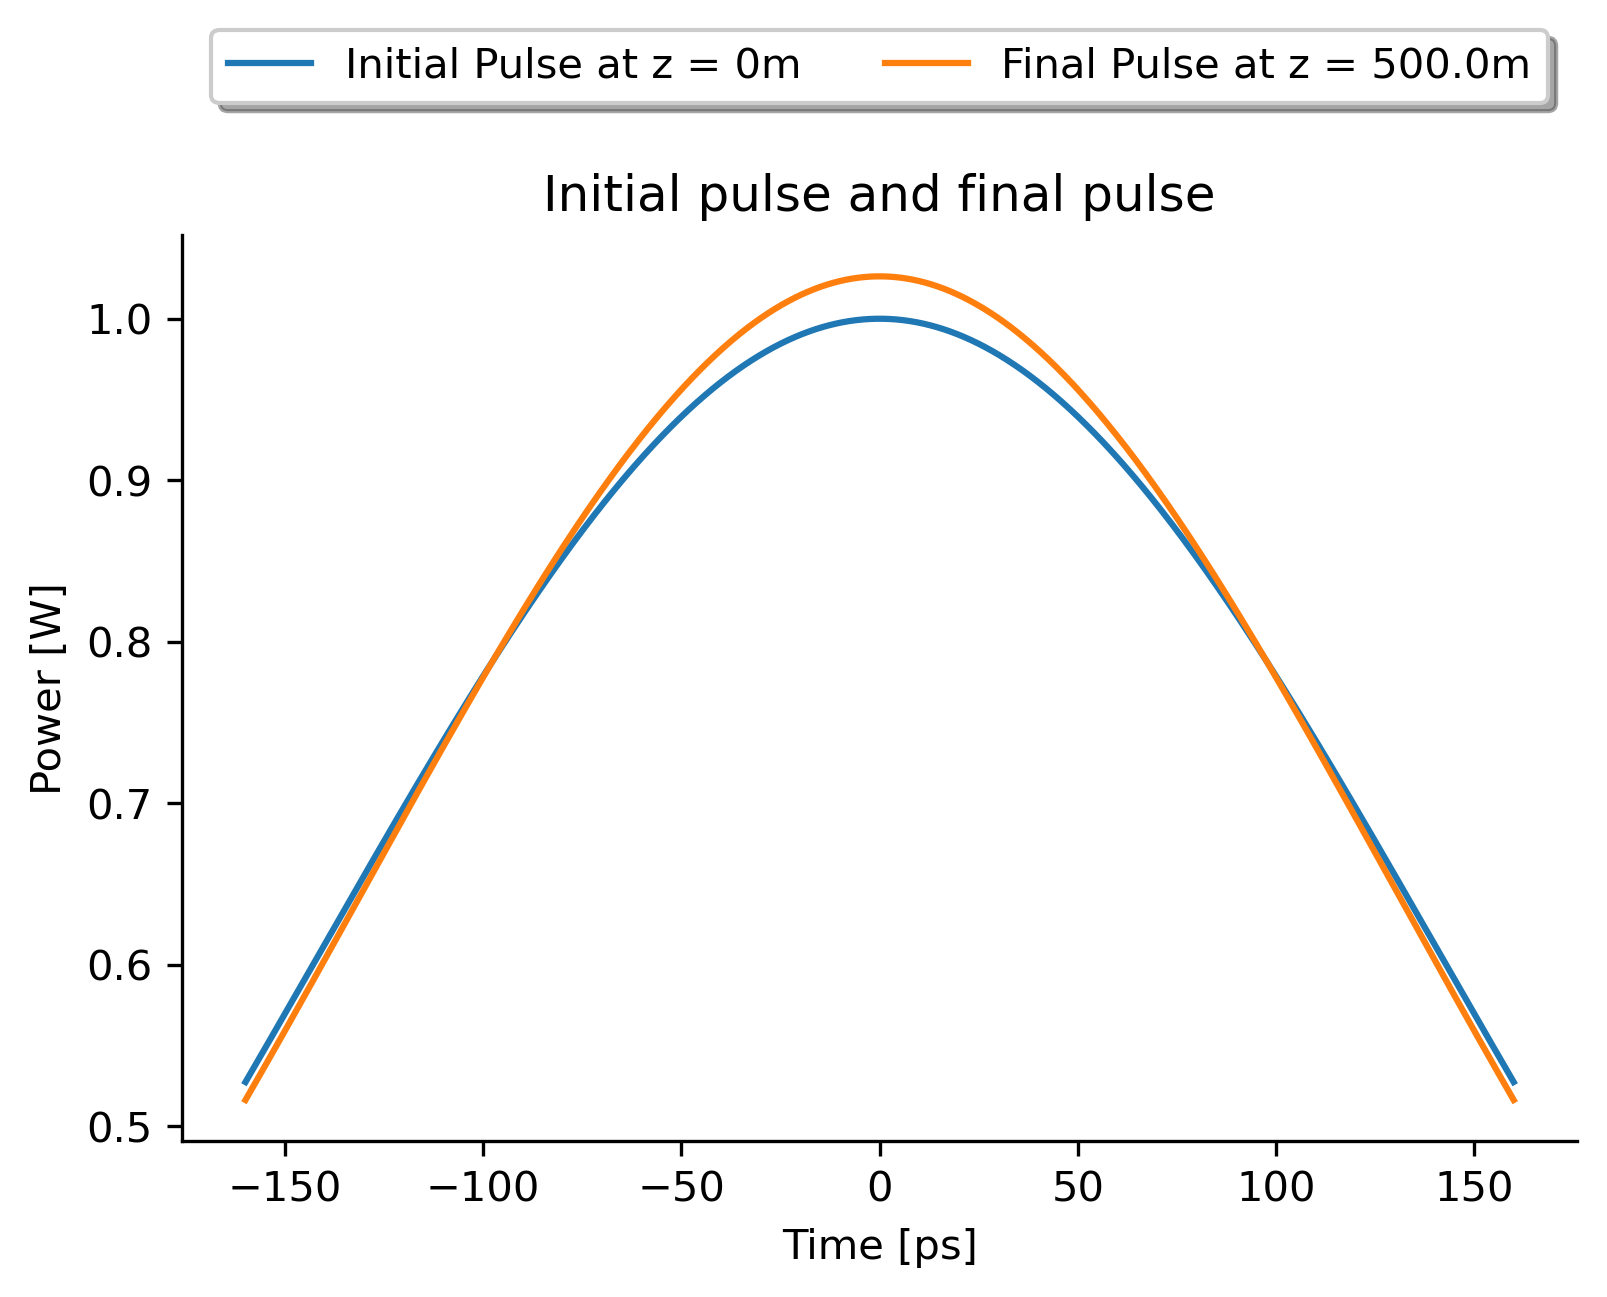

length of zvals = 2049


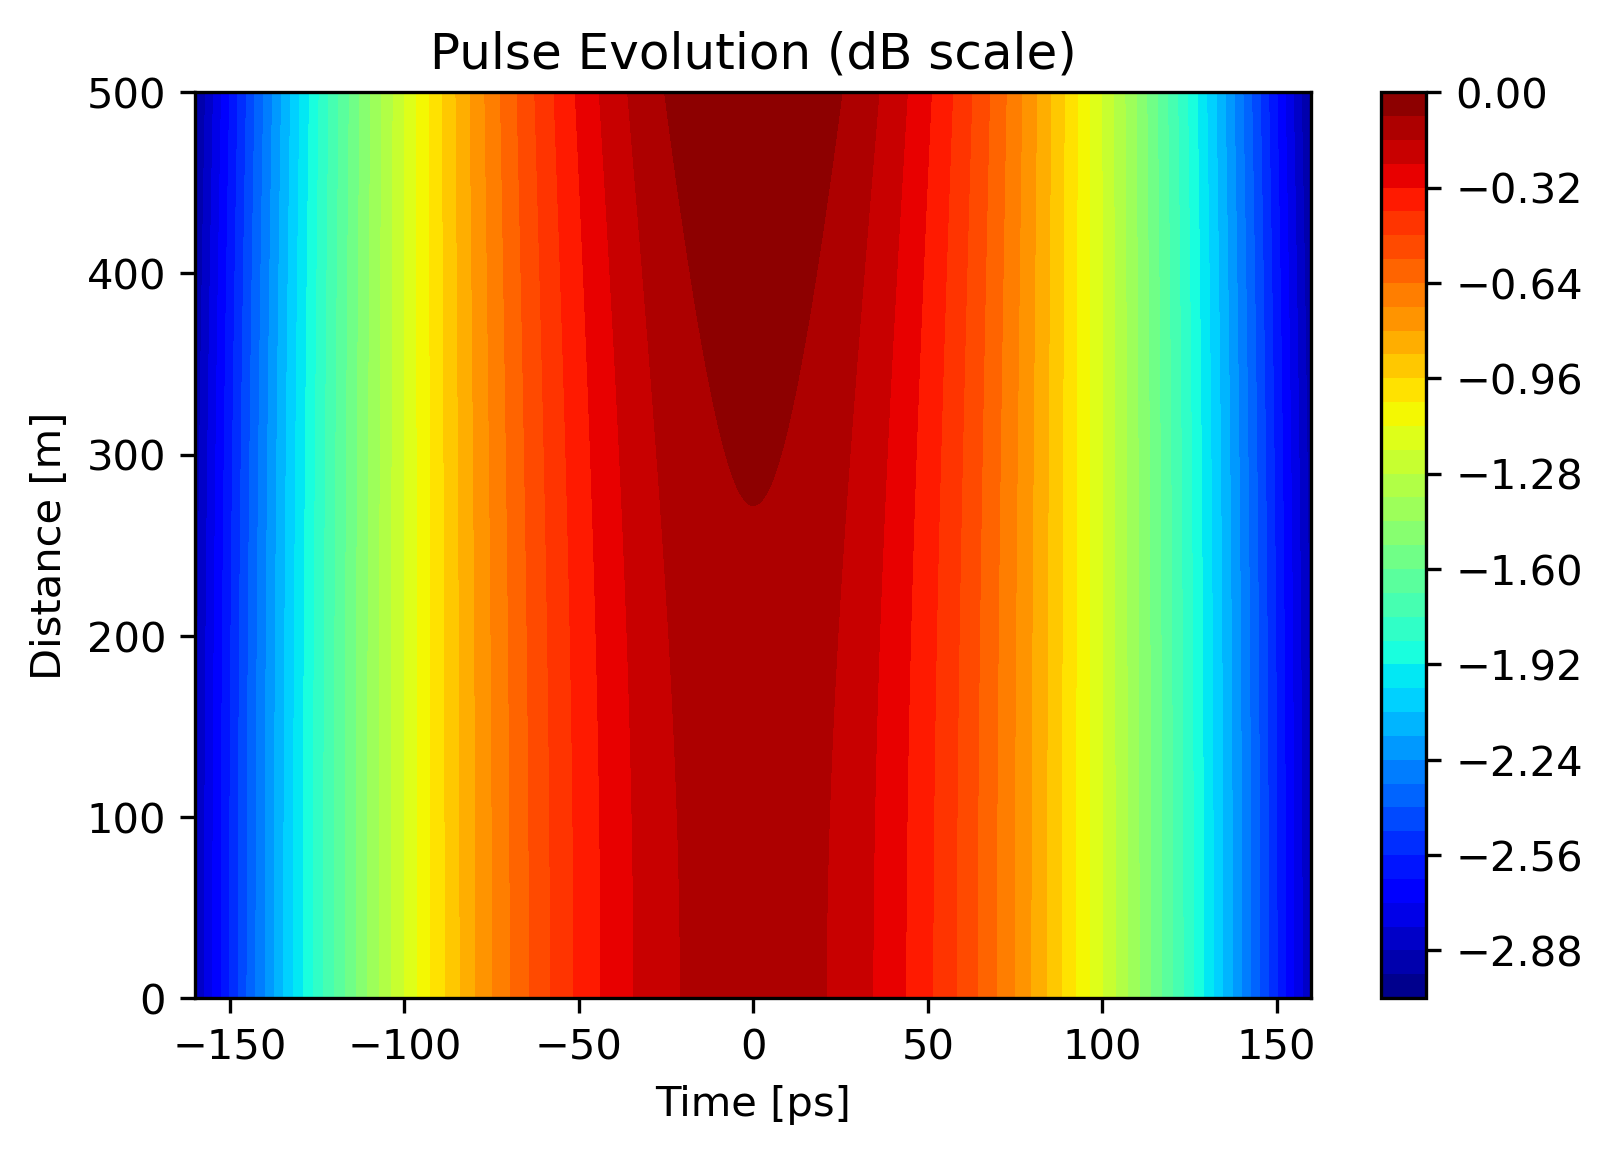

In [18]:
#Plot clean pulses
nrange_pulse=1600
cutoff_pulse=-30
chirpPlotRange_pulse=(-100,100)
plot_everything_about_pulses(ssfm_result_clean,nrange_pulse,cutoff_pulse,chirpPlotRange=chirpPlotRange_pulse)



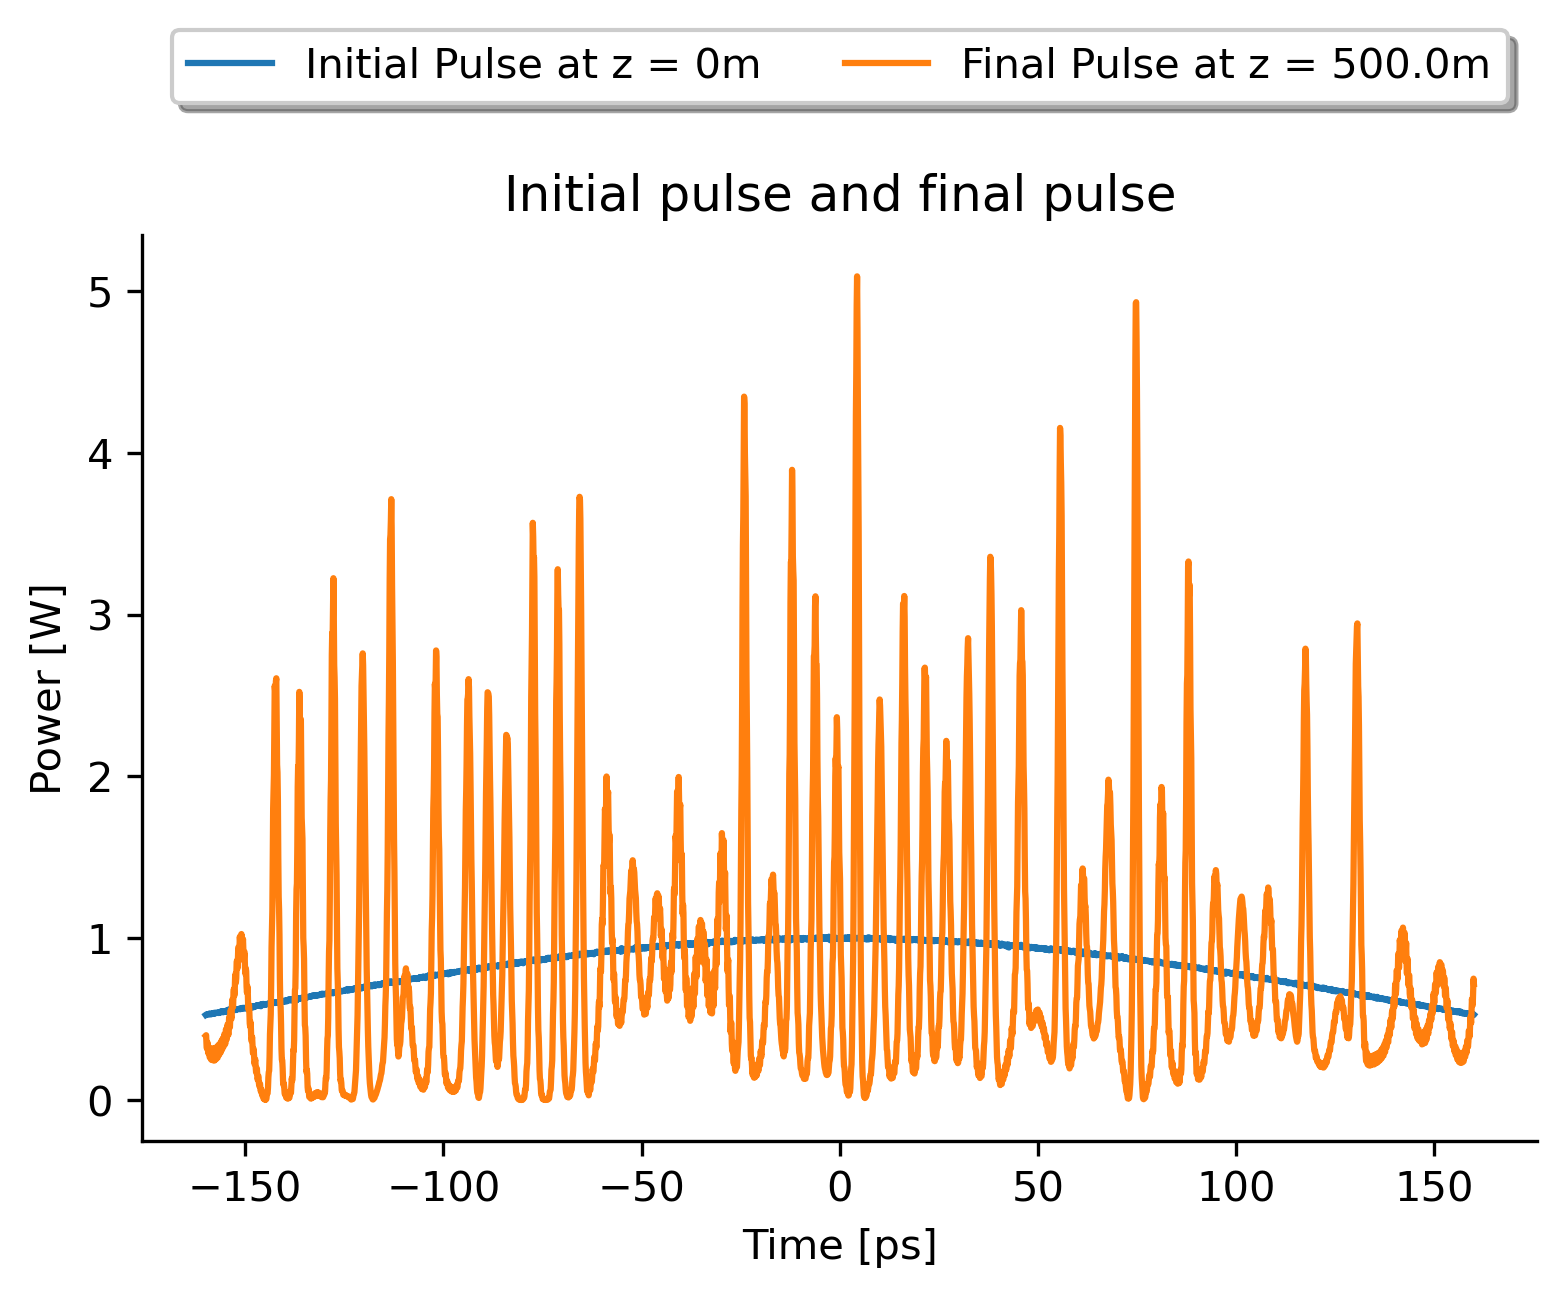

length of zvals = 2049


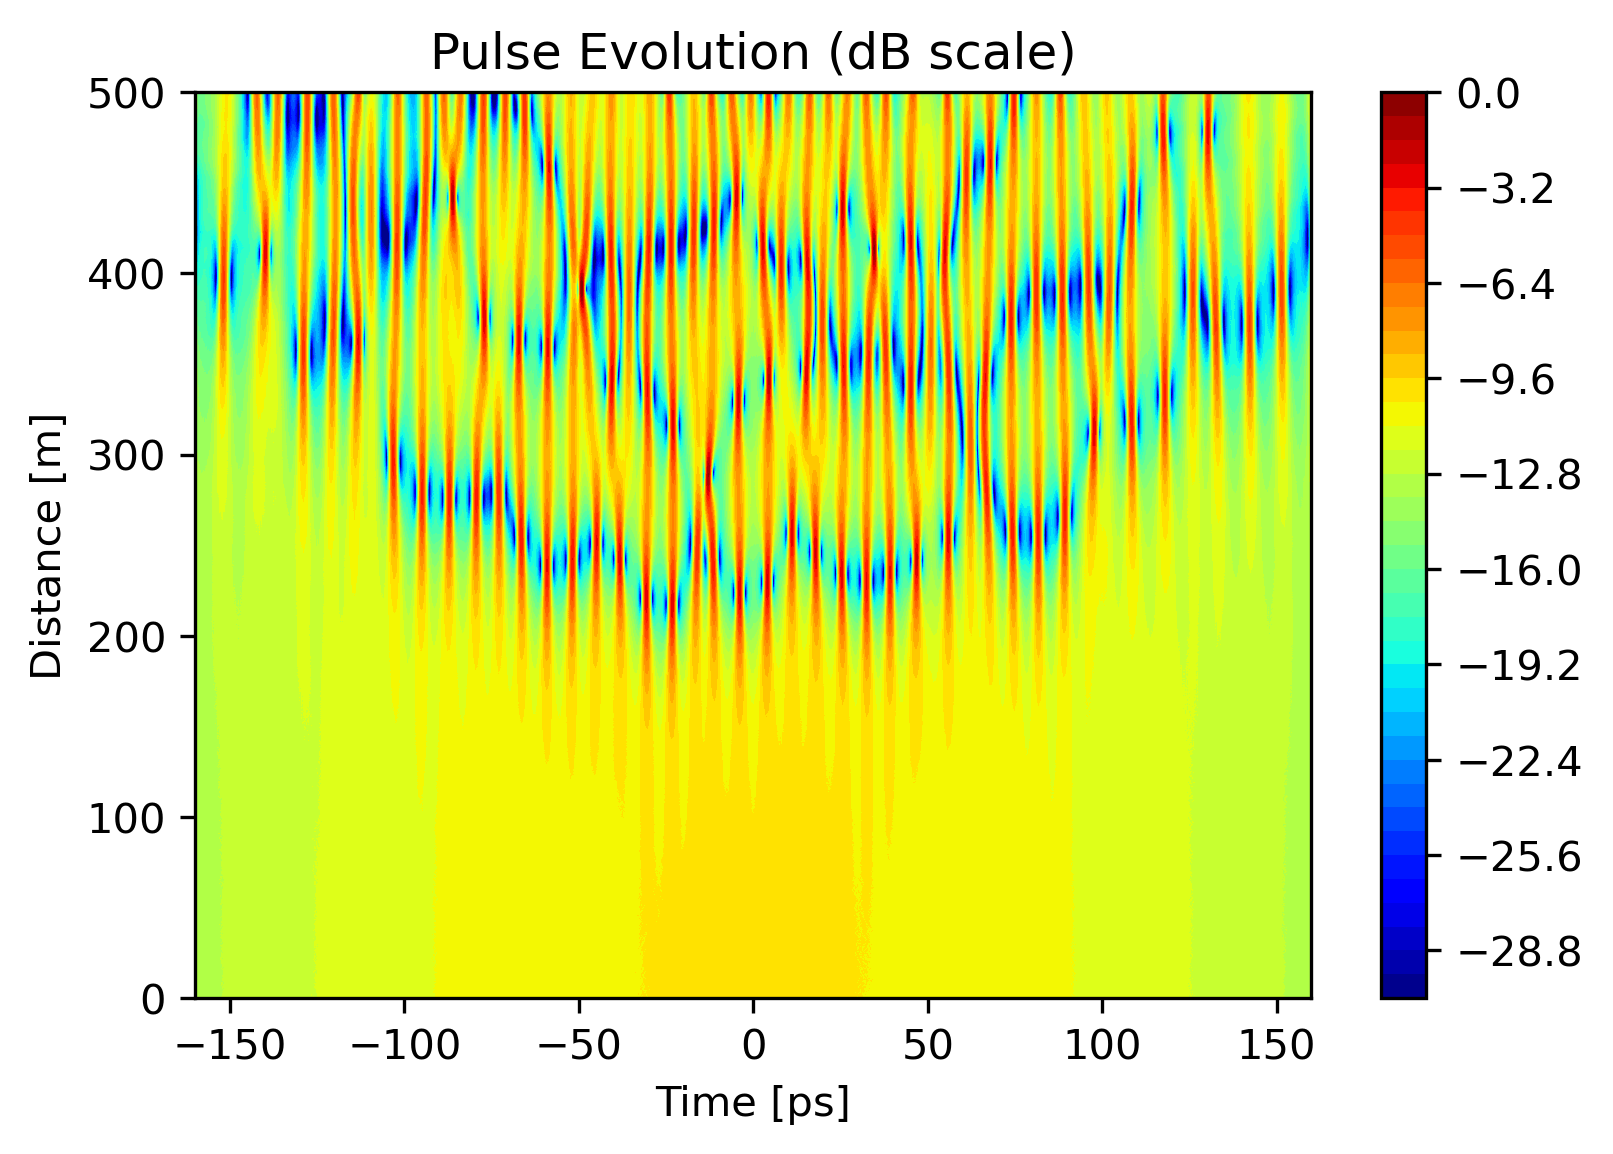

In [19]:
#Plot noisy pulses
plot_everything_about_pulses(ssfm_result_test,nrange_pulse,cutoff_pulse,chirpPlotRange=chirpPlotRange_pulse,savename="MI")
